# Multi-Agentic Orchestration and Reasoning with MCP, A2A and Langgraph Using Amazon Bedrock with OpenAI Proxy

The integration of multi-agentic orchestration and reasoning has become pivotal for tackling complex, multimodal tasks. This notebook delves into the innovative approach of leveraging Amazon Bedrock with an OpenAI proxy to facilitate sophisticated agent interactions. By employing Langgraph for the orchestration of agents, we can utilize the Multi-Agent Coordination Protocol (MCP) to standardize agent-to-tool interfaces, ensuring seamless communication and operation. Additionally, the Agent-to-Agent (A2A) framework enables intra-agent collaboration, fostering collective reasoning capabilities. Together, these technologies empower agents to synergize their strengths, resulting in enhanced problem-solving efficiency and adaptability across diverse, multimodal scenarios.


![image](../images/a2a_mcp_langgraph.png)

* Step 0: Using OpenAI API to proxy Amazon Bedrock models

Allows clients to call Amazon Bedrock foundation models using OpenAI-compatible RESTful APIs for Amazon Bedrock. The deployment is based on the [bedrock-access-gateway](https://github.com/aws-samples/bedrock-access-gateway?tab=readme-ov-file)


* Step 1: Create your own API key in Secrets Manager (MUST)

Note: This step is to use any string (without spaces) you like to create a custom API Key (credential) that will be used to access the proxy API later. This key does not have to match your actual OpenAI key, and you don't need to have an OpenAI API key. please keep the key safe and private.
Open the AWS Management Console and navigate to the AWS Secrets Manager service.

    * Click on "Store a new secret" button.
    
    * In the "Choose secret type" page, select:
    
        * Secret type: Other type of secret Key/value pairs:
            * Key: api_key
            * Value: Enter your API key value
            
    * Click "Next"
    
    * In the "Configure secret" page: Secret name: Enter a name (e.g., "BedrockProxyAPIKey") Description: (Optional) Add a description of your secret
    
    * Click "Next" and review all your settings and click "Store"

After creation, you'll see your secret in the Secrets Manager console. Make note of the secret ARN.

* Step 2: Deploy the CloudFormation stack

    * Sign in to AWS Management Console, switch to the region to deploy the CloudFormation Stack to.

    * Click the following button to launch the CloudFormation Stack in that region. Choose one of the following:

     [ALB + Lambda 1-Click Deploy 🚀](https://console.aws.amazon.com/cloudformation/home?#/stacks/quickcreate?templateURL=https://aws-gcr-solutions.s3.amazonaws.com/bedrock-access-gateway/latest/BedrockProxy.template&stackName=BedrockProxyAPI) 
 
     [ALB + Fargate 1-Click Deploy 🚀](https://console.aws.amazon.com/cloudformation/home?#/stacks/quickcreate?templateURL=https://aws-gcr-solutions.s3.amazonaws.com/bedrock-access-gateway/latest/BedrockProxyFargate.template&stackName=BedrockProxyAPI) 

    * Click "Next".
    * On the "Specify stack details" page, provide the following information:
        * Stack name: Change the stack name if needed.
        * ApiKeySecretArn: Enter the secret ARN you used for storing the API key.
        
    * Click "Next".
        * On the "Configure stack options" page, you can leave the default settings or customize them according to your needs. Click "Next".
        * On the "Review" page, review the details of the stack you're about to create. Check the "I acknowledge that AWS CloudFormation might create IAM resources" checkbox at the bottom. Click "Create stack".

That is it! 🎉 Once deployed, click the CloudFormation stack and go to Outputs tab, you can find the API Base URL from APIBaseUrl, the value should look like http://xxxx.xxx.elb.amazonaws.com/api/v1.


**Make Sure:**

1. Docker engine is up and running
2. Scripts for MCP based math, weather and timezone convertion are in pace
3. The weather mcp server needs to be up and listening on port 8000 using "python mcp_weather_server.pt --service.port 80000 &"
4. All api keys, including Tavily, Google maps are assigned
5. All needed pkgs, inluding InlineAgent, bokeh and mcp are installed. 

In [1]:
from openai import OpenAI
import os
#import boto3
import json
#from botocore.exceptions import ClientError
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY = os.environ["TAVILY_API_KEY"] = os.getenv("tavily_api_token")

In [2]:
# Logging
import logging
logging.basicConfig(filename='/tmp/jupyter_lab.log', level=logging.INFO)
logging.getLogger()

<RootLogger root (INFO)>

In [3]:
prompt = "+++factcheck\n+++Refine(iteration=2)\n+++CiteSources\n How many combined unique letters are adjacent to the 'c' and seperately 'n' in the longest English word?"

In [4]:
os.environ["OPENAI_API_KEY"] = api_key = os.getenv("bedrock_api_token")
os.environ["OPENAI_BASE_URL"] = base_url = os.getenv("bedrock_api_url")

In [5]:
os.getenv("bedrock_api_url")

'http://bedroc-Proxy-mJagqL6uVTpz-789127345.us-west-2.elb.amazonaws.com/api/v1'

## Simple LLM invoke

In [6]:
client = OpenAI() #api_key=api_key, base_url=base_url)
model_id_c37 = "us.anthropic.claude-3-7-sonnet-20250219-v1:0"
model_id_h35 = 'us.anthropic.claude-3-5-haiku-20241022-v1:0'
model_id_c35 = "us.anthropic.claude-3-5-sonnet-20241022-v2:0",
model_id_nova = 'us.amazon.nova-lite-v1:0'
model_id_ds = 'us.deepseek.r1-v1:0'

# Change to your desire model ID
model_id = model_id_c37
completion = client.chat.completions.create(
    model=model_id,
    messages=[{"role": "user", "content": prompt}],
    max_tokens=8192,
)

print(completion.choices[0].message.content)

# Analyzing the Longest English Word and Adjacent Letters to 'c' and 'n'

To determine how many combined unique letters are adjacent to 'c' and 'n' in the longest English word, I'll need to:
1. Identify the longest English word
2. Find all instances of 'c' and 'n'
3. Identify all adjacent letters
4. Count the unique adjacent letters

## The Longest English Word

The longest English word generally accepted in major dictionaries is "pneumonoultramicroscopicsilicovolcanoconiosis"[1][2], which has 45 letters and refers to a lung disease caused by inhaling very fine silicate or quartz dust.

## Adjacent Letters to 'c'

In "pneumonoultramicroscopicsilicovolcanoconiosis", the letter 'c' appears 4 times:
- mi**c**r (adjacent: i, r)
- s**c**o (adjacent: s, o)
- i**c**o (adjacent: i, o)
- ol**c**a (adjacent: l, a)

Letters adjacent to 'c': i, r, s, o, l, a

## Adjacent Letters to 'n'

In "pneumonoultramicroscopicsilicovolcanoconiosis", the letter 'n' appears 4 times:
- p**n**e (adjacent: p, e)
-

## Streaming

In [7]:
import time

In [ ]:
chat_response = client.chat.completions.create(
    model=model_id,
    messages=[
        {"role": "system", "content": "You are a helpful assistant. Please answer the user question accurately and truthfully. Also please make sure to think carefully before answering"},
        {"role": "user", "content": prompt},
    ],
    stream=True,
    temperature=1.0,
    max_tokens=8192,
)
#for chunk in chat_response:
#    print(chunk.choices[0].delta.content , end="", flush=True) if chunk.choices[0].delta.content else None

start_time = time.time()
# create variables to collect the stream of chunks
collected_chunks = []
collected_messages = []
# iterate through the stream of events
for chunk in chat_response:
    chunk_time = time.time() - start_time  # calculate the time delay of the chunk
    collected_chunks.append(chunk)  # save the event response
    chunk_message = chunk.choices[0].delta.content  # extract the message
    collected_messages.append(chunk_message)  # save the message
    print(f"Message received {chunk_time:.2f} seconds after request: {chunk_message}")  # print the delay and text

# print the time delay and text received
print(f"Full response received {chunk_time:.2f} seconds after request")
# clean None in collected_messages
collected_messages = [m for m in collected_messages if m is not None]
full_reply_content = ''.join(collected_messages)
print(f"Full conversation received: {full_reply_content}")

## Chat with Langchain

In [8]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage

llm = ChatOpenAI(
    model=model_id,
    temperature=0.5,
    max_tokens=None,
    timeout=None,
    max_retries=5,
    # api_key="...",  # if you prefer to pass api key in directly instaed of using env vars
    # base_url="...",
    # organization="...",
    # other params...
)

llm_nova = ChatOpenAI(
    model=model_id_nova,
    temperature=0.5,
    max_tokens=None,
    timeout=None,
    max_retries=5,
    # api_key="...",  # if you prefer to pass api key in directly instaed of using env vars
    # base_url="...",
    # organization="...",
    # other params...
)

llm_ds = ChatOpenAI(
    model=model_id_ds,
    temperature=0.5,
    max_tokens=None,
    timeout=None,
    max_retries=5,
    # api_key="...",  # if you prefer to pass api key in directly instaed of using env vars
    # base_url="...",
    # organization="...",
    # other params...
)


messages = [
    (
        "system",
        "You are a reliable assistant capable of providing truthful and accurate answers to questions.",
    ),
    ("human", prompt),
]

'''
messages = [
        SystemMessage(content="You are a reliable assistant capable of providing truthful and accurate answers to questions."), 
        HumanMessage(content=prompt)
    ]
    '''
responds = llm_nova.invoke(messages)

In [ ]:
responds.content

## With multi-agent langgraph

In [9]:
from pydantic import BaseModel, Field
from typing import Dict, List, Any, Optional

# Define state schema
class dynGraphState(BaseModel):
    query: str
    plan: Optional[List[str]] = None
    current_step: Optional[str] = None
    context: Dict[str, Any] = Field(default_factory=dict)
    response: Optional[str] = None
    llm_model_id: str = "us.amazon.nova-lite-v1:0"
    subgraph_result: Optional[str] = None

In [10]:
### Planner
def create_plan(state: dynGraphState) -> dynGraphState:
    llm = ChatOpenAI(model=state.llm_model_id)
    structured_llm = llm.with_structured_output(Plan)
    chain = planner_prompt | structured_llm
    # Prepare context and messages
    plan = chain.invoke({
        "messages": messages,
        "book_context": book_context_str,
        "user_context": user_str,
        "agent_descriptions": "\n---\n".join(agent_descriptions),
    })
    return PlannerState(
        user_chat_message_and_context=state.user_chat_message_and_context,
        selected_plan=plan,
    )

In [11]:
from typing import Annotated
from langchain_core.tools import tool
from langchain_experimental.utilities import PythonREPL
from langgraph.graph import MessagesState, END
from langgraph.types import Command
from typing import Literal
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver

tavily_tool = TavilySearchResults(max_results=5)

# Warning: This executes code locally, which can be unsafe when not sandboxed

repl = PythonREPL()


@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    result_str = f"Successfully executed:\n```python\n{code}\n```\nStdout: {result}"
    return (
        result_str + "\n\nIf you have completed all tasks, respond with FINAL ANSWER."
    )

def make_system_prompt(suffix: str) -> str:
    return (
        "You are a helpful AI assistant, collaborating with other assistants."
        " Use the provided tools to progress towards answering the question."
        " If you are unable to fully answer, that's OK, another assistant with different tools "
        " will help where you left off. Execute what you can to make progress."
        " If you or any of the other assistants have the final answer or deliverable,"
        " prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{suffix}"
    )


def chart_node(state: MessagesState) -> Command[Literal["researcher", END]]:
    result = chart_agent.invoke(state)
    goto = get_next_node(result["messages"][-1], "researcher")
    # wrap in a human message, as not all providers allow
    # AI message at the last position of the input messages list
    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="chart_generator"
    )
    return Command(
        update={
            # share internal message history of chart agent with other agents
            "messages": result["messages"],
        },
        goto=goto,
    )

def get_next_node(last_message: BaseMessage, goto: str):
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    return goto


# Research agent and node
research_agent = create_react_agent(
    llm,
    tools=[tavily_tool],
    checkpointer=MemorySaver(),
    prompt=make_system_prompt(
        "You can only do research. You are working with a chart generator colleague."
    ),
)


def research_node(
    state: MessagesState,
) -> Command[Literal["chart_generator", END]]:
    print(f"In researcher node: {state}\n------\n")
    result = research_agent.invoke(state)
    goto = get_next_node(result["messages"][-1], "chart_generator")
    # wrap in a human message, as not all providers allow
    # AI message at the last position of the input messages list
    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="researcher"
    )
    return Command(
        update={
            # share internal message history of research agent with other agents
            "messages": result["messages"],
        },
        goto=goto,
    )
    
# Chart generator agent and node
# NOTE: THIS PERFORMS ARBITRARY CODE EXECUTION, WHICH CAN BE UNSAFE WHEN NOT SANDBOXED
chart_agent = create_react_agent(
    llm,
    [python_repl_tool],
    prompt=make_system_prompt(
        "You can only generate charts. You are working with a researcher colleague."
    ),
)


def chart_node(state: MessagesState) -> Command[Literal["researcher", END]]:
    result = chart_agent.invoke(state)
    goto = get_next_node(result["messages"][-1], "researcher")
    # wrap in a human message, as not all providers allow
    # AI message at the last position of the input messages list
    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="chart_generator"
    )
    return Command(
        update={
            # share internal message history of chart agent with other agents
            "messages": result["messages"],
        },
        goto=goto,
    )

### Research agent

from langchain import hub
#from langgraph.prebuilt import create_react_agent
#from langchain.agents import AgentExecutor, create_openai_tools_agent

TAVILY_API_KEY = os.environ["TAVILY_API_KEY"] = os.getenv("tavily_api_token")

# Today
def get_current_time():
    """Returns the current time in MM-dd-YYYY format."""
    import datetime  # Import datetime module to get current time

    now = datetime.datetime.now()  # Get current time
    return now.strftime("%B-%d-%Y")  # Format time in H:MM AM/PM format

tavily_tool = TavilySearchResults(max_results=3)

# Define tools
tools = [get_current_time,tavily_tool]

# Research agent and node
research_agent = create_react_agent(
    llm,
    tools=[tavily_tool],
    #checkpointer=MemorySaver(),
    prompt=make_system_prompt(
        "You can only do research. You are working with a chart generator colleague."
    ),
)

### MCP Server API node

The combination of multiple MCP clients to interact with different tools

In [12]:
#from contextlib import asynccontextmanager
from langchain_mcp_adapters.client import MultiServerMCPClient
#from langgraph.prebuilt import create_react_agent
from langchain_core.messages import SystemMessage, HumanMessage

#@asynccontextmanager
async def mcp_nodes(state: MessagesState) -> Command[Literal[END]]:
    print(f"In mcp_nodes: {state}\n=======\n")
    async with MultiServerMCPClient(
        {
            "weather": {
                # make sure you start your weather server on port 8000
                "url": "http://localhost:8000/sse",
                "transport": "sse",
            },
            "pdf-reader": {
                "command": "/home/aaron/.conda/envs/firstaid/bin/python",
                "args": ["/home/aaron/src/first-aid/demo/firstaid/backend/scripts/mcp_pdf_server.py"],
                "transport": "stdio",
            },
            "pubmed": {
                "command": "/home/aaron/.conda/envs/firstaid/bin/python",
                "args": ["/home/aaron/src/first-aid/demo/firstaid/backend/scripts/pubmed/server.py"],
                "transport": "stdio",
            }
        }
    ) as client:
        agent = create_react_agent(llm_nova, client.get_tools(), checkpointer=MemorySaver())
        # Add system message
        system_message = SystemMessage(content=(
                "You have access to multiple tools that can help answer queries. "
                "Use them dynamically and efficiently based on the user's request. "
        ))
        
        result = await agent.ainvoke(state)
        #result["messages"][-1] = HumanMessage(
        #    content=result["messages"][-1].content, name="mcp_client"
        #)
        print(f"Result: {result}\n++++++\n")
        #goto = get_next_node(result["messages"][-1], END)
        print(f"IN MCP_nodes: {result["messages"]}")
        return Command(
            update={
                # share internal message history of chart agent with other agents
                "messages": result["messages"][-1].content,
            },
            #goto=goto,
        )

### Single MCP agent for query Medrxiv

In [31]:
from mcp import ClientSession, StdioServerParameters

## Single client
server_params_medrxiv = StdioServerParameters(
    command="/home/aaron/.conda/envs/firstaid/bin/python",
    # Make sure to update to the full absolute path to your math_server.py file
    args=["/home/aaron/src/first-aid/demo/firstaid/backend/scripts/medrxiv/medrxiv_server.py"],
    transport="stdio",
)

async def medrxiv_node(state: MessagesState): # -> Command[Literal[["map_plotter", "weather_forecast"], END]]:
    async with stdio_client(server_params_medrxiv) as (read, write):
        async with ClientSession(read, write) as session:
            # Initialize the connection
            await session.initialize()
    
            # Get tools
            tools = await load_mcp_tools(session)

            print('TOOLS------\n')
            print(tools)
    
            # Create and run the agent
            agent = create_react_agent(llm, tools, checkpointer=MemorySaver())
            result = await agent.ainvoke(state) 
            print(f"Medrxiv result: {result}\n\n")
            #goto = get_next_node(result["messages"][-1], "map_plotter")
            return Command(
                update={
                    # share internal message history of chart agent with other agents
                    "messages": result["messages"][-1].content,
                },
                #goto=goto,
            )

## Single MCP Client with cascaded executions

Extract longitude and Latitude from a output of a text prompt, then plot the map used the lat/long as the center.

In [32]:
## Single client
from mcp.client.stdio import stdio_client
from mcp.client.sse import sse_client

from langchain_mcp_adapters.tools import load_mcp_tools
from langgraph.prebuilt import create_react_agent
#from InlineAgent import AgentAppConfig
#config = AgentAppConfig()

from bokeh.models import ColumnDataSource
from bokeh.plotting import gmap
from bokeh.models import GMapOptions
from bokeh.io import output_notebook
import pandas as pd
from bokeh.io import show

import re

GMAPS_API_KEY = os.getenv("gmaps_api_token")
PERPLEXITY_API_KEY = os.getenv('openperplex_api_token')


google_maps_server_params = StdioServerParameters(
    command="docker",
    args=[
        "run",
        "-i",
        "--rm",
        "-e",
        "GOOGLE_MAPS_API_KEY",
        "mcp/google-maps"
      ],
    env={"GOOGLE_MAPS_API_KEY": GMAPS_API_KEY},
)

# server_params_medrxiv = StdioServerParameters(
#     command="python",
#     # Make sure to update to the full absolute path to your math_server.py file
#     args=["/home/aaron/src/first-aid/scripts/mcp_math_server.py"],
# )


async def gmaps_node(state: MessagesState): # -> Command[Literal[["map_plotter", "weather_forecast"], END]]:
    async with stdio_client(google_maps_server_params) as (read, write):
        async with ClientSession(read, write) as session:
            # Initialize the connection
            await session.initialize()
    
            # Get tools
            tools = await load_mcp_tools(session)
    
            # Create and run the agent
            agent = create_react_agent(llm, tools, checkpointer=MemorySaver())
            result = await agent.ainvoke(state) 
            print(f"Google Maps result: {result}\n\n")
            #goto = get_next_node(result["messages"][-1], "map_plotter")
            return Command(
                update={
                    # share internal message history of chart agent with other agents
                    "messages": result["messages"][-1].content,
                },
                #goto=goto,
            )

def plot_node(state: MessagesState) -> Command[Literal[END]]:
    output_notebook()
    bokeh_width, bokeh_height = 1024,768
    map_type = "satellite" #or satellite or roadmap
    zoom = 10

    
    # Find latitude
    text = f"+++OutputFormat(format=JSON)\n\nExtract the longitude and latitude from the following JSON format: latitude:<>, \n longitude:<>. If no values are found, assign zero. : {state['messages'][-1].content}"
    messages = [
        SystemMessage(content="You are a reliable assistant capable of extracting coordinates from text."), 
        HumanMessage(content=text)
    ]
    # Extract latitude and longitude
    data = json.loads(re.sub(r'```json\n|\n```', '', llm_nova(messages).content))
    print(f"In maps plotter: {data}")
    # Extract latitude and longitude
    lat_match = data["latitude"] if data["latitude"] else data["Latitude"]
    lng_match = data["longitude"] if data["longitude"] else data["Longitude"]
    
    if lat_match and lng_match:
        lat = float(str(lat_match))
        lng = float(str(lng_match))
        #lng = float(lng_match.group(1))
    else:
        lat = 0.00
        lng = 0.00

    #print(f"lat and lng are: {lat} and {lng}")
    gmap_options = GMapOptions(lat=lat, lng=lng, 
                               map_type=map_type, zoom=zoom)
    p = gmap(GMAPS_API_KEY, gmap_options, title='MCP Maps', width=bokeh_width, height=bokeh_height)
    show(p)

    goto = get_next_node(state["messages"][-1], END)
    # wrap in a human message, as not all providers allow
    # AI message at the last position of the input messages list
    state["messages"][-1] = HumanMessage(
        content=f"Map plot for {text}", name="map_plotter"
    )
    return Command(
        update={
            # share internal message history of chart agent with other agents
            "messages": state["messages"],
        },
        goto=goto,
    )

## LangGraph concurrent agent execution

In [21]:
## Add Parallel graph
#from langchain_core.tools import tool
from geopy.geocoders import Nominatim
from datetime import datetime, timedelta
#from pydantic import BaseModel, Field

geolocator = Nominatim(user_agent="weather-app")
    
#@tool("weather_forecast_node", return_direct=True)
def weather_forecast_node(state: MessagesState) -> Command[Literal[END]]:
    """Retrieves the weather using Open-Meteo API for a given location (city) and a date (yyyy-mm-dd). Returns a list dictionary with the time and temperature for each hour."""
    #location = geolocator.geocode(state['messages'][-1].content)
    # Get the current date
    current_date = datetime.now()
    formatted_date = current_date.strftime("%Y-%m-%d")
    # Calculate tomorrow's date
    tomorrow = current_date + timedelta(days=1)
    tomorrow_formatted = tomorrow.strftime('%Y-%m-%d')
   
    # Find latitude
    text = f"+++OutputFormat(format=JSON)\n\nExtract the longitude and latitude from the following JSON format: latitude:<>, \n longitude:<>. If no values are found, assign zero. : {state['messages'][-1].content}"
    messages = [
        SystemMessage(content="You are a reliable assistant capable of extracting coordinates from text."), 
        HumanMessage(content=text)
    ]
    # Extract latitude and longitude
    data = json.loads(re.sub(r'```json\n|\n```', '', llm_nova(messages).content))
    print(f"In maps plotter: {data}")
    # Extract latitude and longitude
    lat_match = data["latitude"] if data["latitude"] else data["Latitude"]
    lng_match = data["longitude"] if data["longitude"] else data["Longitude"]
    
    if lat_match and lng_match:
        lat = float(str(lat_match))
        lng = float(str(lng_match))
        #lng = float(lng_match.group(1))
    else:
        lat = 0.00
        lng = 0.00
        
    print(f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lng}&hourly=temperature_2m&start_date={formatted_date}&end_date={tomorrow_formatted} +++===\n")
    response = requests.get(f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lng}&hourly=temperature_2m&start_date={formatted_date}&end_date={tomorrow_formatted}")
    # Combine the lists into a dictionary
    dates = response.json()["hourly"]["time"]
    temperatures = response.json()["hourly"]["temperature_2m"]
    my_data = {
        "dates": dates,
        "temperatures": temperatures
    }
    goto = get_next_node(state["messages"][-1], END)
    return Command(
        update={
            # share internal message history of chart agent with other agents
            "messages": json.dumps(my_data),
        },
        goto=goto,
    )

### InlineAgent from AWS

from InlineAgent.tools import MCPStdio
from InlineAgent.action_group import ActionGroup
from InlineAgent.agent import InlineAgent
from InlineAgent import AgentAppConfig

config = AgentAppConfig()

perplexity_server_params = StdioServerParameters(
    command="docker",
    args=["run", "-i", "--rm", "-e", "PERPLEXITY_API_KEY", "mcp/perplexity-ask"],
    env={"PERPLEXITY_API_KEY": os.getenv('openperplex_api_token')},
)

async def perplexity_node_inlineagent(state: MessagesState) -> Command[Literal[END]]:
    preplexity_mcp_client = await MCPStdio.create(server_params=perplexity_server_params)
    print(f"In inlineagent: {state}")
    try:

        preplexity_action_group = ActionGroup(
            name="SearchActionGroup",
            mcp_clients=[preplexity_mcp_client],
        )

        await InlineAgent(
            foundation_model=model_id,
            instruction="""You are a friendly assistant that is responsible for resolving user queries. """,
            agent_name="search_agent",
            action_groups=[preplexity_action_group],
        ).invoke(input_text=state['messages'][0].content)

    finally:

        await preplexity_mcp_client.cleanup()

    goto = get_next_node(result["messages"][-1], END)
    return Command(
        update={
            # share internal message history of chart agent with other agents
            "messages": result["messages"][-1].content,
        },
        goto=goto,
    )

### Router

In [22]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from typing import Literal, List
from pydantic import BaseModel, Field


# Define prompts
question_category_prompt = """You are a planner agent who decides which team to dispatch to based on the user's input. 
Depending on your answer, question will be routed to the right team, so your task is crucial. 
There are 3 possible question types:
- sub_graph_med - Answer questions only related to pdf file reader, query medrxiv or query pubmed.
- sub_graph_maps - Answer questions about maps related topic.
- a2a_client - Answer questions about currency exchange rates.
- a2a_crewai_client - Answer questions about image generation from text.
- sub_graph_research -  Answer questions related to making charts on complex topics which requires reasoning and extensive research.
- perplexity_client - Answer questions required web search for timely and common information.
Return in the output only one word (sub_graph_med, sub_graph_maps, sub_graph_research, a2a_client, a2a_crewai_client or perplexity_client)
"""

rewrite_prompt = """You are a Prompt Optimization Assistant specialized in refining and enhancing user-provided prompts. Your expertise lies in:
- Clarifying ambiguous instructions
- Maintaining the original intent while enhancing clarity
When a user shares a prompt with you, analyze it carefully, then provide an optimized version that preserves their core objective while making it more precise, comprehensive, and effective.
Output only your answer in text string format.
"""

# define router
def rewrite_node(state: MessagesState):
    print(f"Here: {state['messages'][0].content}\n\n")
    messages = [
        SystemMessage(content=rewrite_prompt), 
        HumanMessage(content=state['messages'][0].content)
    ]

    result = llm_nova.invoke(messages)
    state['messages'][0].content = result.content
    #goto = get_next_node(result, router_dispatcher)
    print(f"NOW state after rewite: {result.content}\n\n")
    return Command(
        update={
            # share internal message history of chart agent with other agents
            "messages": result.content,
        },
        #goto=goto,
    )

def router_dispatcher(state: MessagesState):
    print(f"Before router_dispatcher: {state}\n\n")
    print(f"..and message: {state['messages']}\n\n")
    messages = [
        SystemMessage(content=question_category_prompt), 
        HumanMessage(content=state['messages'][-1].content)
    ]

    result = llm.invoke(messages)
    print(f"After router_dispatcher: {result}\n\n")
    print(f"... and type: {type(result)}\n\n")
    if "sub_graph_med" in result.content:
        return "sub_graph_med"
    elif "sub_graph_research" in result.content:
        print("Dispatching to sub graph...")
        return "sub_graph_research"
    elif "sub_graph_maps" in result.content:
        print("Dispatching to google maps MCP...")
        return "sub_graph_maps"
    elif "perplexity_client" in result.content:
        return "perplexity_client"
    elif "a2a_client" in result.content:
        return "a2a_client"
    elif "a2a_crewai_client" in result.content:
        return "a2a_crewai_client"
    else:
        return END

### Add A2A

Make sure port 8090 is up by runing the A2A Langrapgh python sample code.

In [23]:
import requests
import json
from collections import defaultdict

def list_dedup(data: list, item_index: str):
    # Group by index and extract unique texts
    grouped_texts = defaultdict(set)
    
    for item in data:
        index = item['index']
        text = item['parts'][0]['text']
        grouped_texts[index].add(text)
    
    # Convert sets back to lists for the final result
    result = [{'index': item_index, 'texts': list(texts)} for index, texts in grouped_texts.items()]
    return result

def a2a_client_node(state: MessagesState) -> Command[Literal[END]] :
    url='http://localhost:8090'
    item_index=11
    session_id='8f01f3d172cd4396a0e535ae8aec6688'
    print(f"In a2a: {state['messages'][0].content}")
    # Define the payload
    payload = {
        "jsonrpc": "2.0",
        "id": item_index,
        "method": "tasks/send",
        "params": {
            "id": "129",
            "sessionId": session_id,
            "acceptedOutputModes": ["text"],
            "message": {
                "role": "user",
                "parts": [
                    {
                        "type": "text",
                        "text": state['messages'][0].content
                    }
                ]
            }
        }
    }

    # Define the headers
    headers = {
        "Content-Type": "application/json"
    }

    # Send the POST request
    response = requests.post(url, headers=headers, data=json.dumps(payload))
    # Return the response
    #response.json()
    msg = str(list_dedup(response.json()["result"]["artifacts"], item_index))
    print(f"In a2a cient: {msg}")
    #goto = get_next_node(msg, END)
    return Command(
        update={
            # share internal message history of chart agent with other agents
            "messages": msg,
        },
        #goto=goto,
    )

### A2A client-server 

A2A interacte with CrewAI

In [24]:
import base64

def a2a_crewai_node(state: MessagesState) -> Command[Literal[END]] :
    url='http://localhost:8080'
    item_index=12
    session_id='8f01f3d172cd4396a0e535ae8aec6689'
    # Define the payload
    payload = {
        "jsonrpc": "2.0",
        "id": item_index,
        "method": "tasks/send",
        "params": {
            "id": "129",
            "sessionId": session_id,
            "acceptedOutputModes": ["text"],
            "message": {
                "role": "user",
                "parts": [
                    {
                        "type": "text",
                        "text": state['messages'][0].content
                    }
                ]
            }
        }
    }

    # Define the headers
    headers = {
        "Content-Type": "application/json"
    }

    # Send the POST request
    response = requests.post(url, headers=headers, data=json.dumps(payload))
    # Return the response
    # Extract the Base64-encoded image data
    image_bytes_base64 = response.json()['result']['artifacts'][-1]['parts'][0]['file']['bytes']  # 0 the first image generated, caching multi-run results
    # Decode the Base64 string to binary data
    image_data = base64.b64decode(image_bytes_base64)

    # Save to a file
    with open('../images/cat_dog.png', 'wb') as f:
      f.write(image_data)

    return Command(
        update={
            # share internal message history of chart agent with other agents
            "messages": state['messages'][-1].content,
        },
    )

## Build a reflection agent for judge (Under construction and yet to be implemeneted)

In [25]:
from langgraph_reflection import create_reflection_graph
from openevals.llm import create_llm_as_judge

# Define a more detailed critique prompt with specific evaluation criteria
critique_prompt = """You are an expert judge evaluating AI responses. Your task is to critique the AI assistant's latest response in the conversation below.

Evaluate the response based on these criteria:
1. Accuracy - Is the information correct and factual?
2. Completeness - Does it fully address the user's query?
3. Clarity - Is the explanation clear and well-structured?
4. Helpfulness - Does it provide actionable and useful information?
5. Safety - Does it avoid harmful or inappropriate content?

If the response meets ALL criteria satisfactorily, set pass to True.

If you find ANY issues with the response, do NOT set pass to True. Instead, provide specific and constructive feedback in the comment key and set pass to False.

Be detailed in your critique so the assistant can understand exactly how to improve.

<response>
{outputs}
</response>"""

def judge_response(state, config):
    """Evaluate the assistant's response using a separate judge model."""
    evaluator = create_llm_as_judge(
        prompt=critique_prompt,
        model="openai:o3-mini",
        feedback_key="pass",
    )
    eval_result = evaluator(outputs=state["messages"][-1].content, inputs=None)

    if eval_result["score"]:
        print("✅ Response approved by judge")
        return
    else:
        # Otherwise, return the judge's critique as a new user message
        print("⚠️ Judge requested improvements")
        return {"messages": [{"role": "user", "content": eval_result["comment"]}]}


ModuleNotFoundError: No module named 'langgraph_reflection'

from datetime import datetime
from asyncio import sleep
from langchain_core.messages import AIMessage

def wait_and_message_node(m, seconds=1):
    async def _node(state: MessagesState):
        print(f"Starting node {m} at {datetime.now().second}")
        await sleep(seconds)
        return {"messages": [AIMessage(m)]}
    return _node

### Construct a graph with multiple subgraphs

- **Question:** can we leverage reasoning model to construct a dynamic graph based on user query?
  
- **Answer:** Probbaly. Soeone has done [experimental works](https://github.com/langchain-ai/langgraph/discussions/2219)

In [26]:
from langgraph.graph import StateGraph, START
from langgraph.pregel import RetryPolicy

workflow = StateGraph(MessagesState)
workflow.add_node("rewrite_client", rewrite_node)
#workflow.add_node("mcp_client", mcp_nodes, retry=RetryPolicy(max_attempts=2))
workflow.add_node("a2a_client", a2a_client_node)
workflow.add_node("a2a_crewai_client", a2a_crewai_node)
workflow.add_edge(START, "rewrite_client")
workflow.add_conditional_edges("rewrite_client", router_dispatcher)

sub1_workflow = StateGraph(MessagesState)
#for node in ["researcher", "chart_generator"]:
#  sub_workflow.add_node(node, wait_and_message_node(f"Node: {node}"))
sub1_workflow.add_node("researcher", research_node)
sub1_workflow.add_node("chart_generator", chart_node)
sub1_workflow.add_edge(START, "researcher")
#sub_workflow.add_edge("chart_generator", END)
subgraph_research = sub1_workflow.compile()

sub2_workflow = StateGraph(MessagesState)
sub2_workflow.add_node("gmaps_client", gmaps_node)
sub2_workflow.add_node("map_plotter", plot_node)
sub2_workflow.add_node("weather_forecast", weather_forecast_node)
sub2_workflow.add_edge(START, "gmaps_client")
sub2_workflow.add_edge("gmaps_client", "map_plotter")
sub2_workflow.add_edge("gmaps_client", "weather_forecast")
#sub2_workflow.add_edge("weather_forecast", END)
subgraph_maps = sub2_workflow.compile()

sub3_workflow = StateGraph(MessagesState)
sub3_workflow.add_node("mcp_client", mcp_nodes, retry=RetryPolicy(max_attempts=2))
sub3_workflow.add_node("medrxiv_client", medrxiv_node, retry=RetryPolicy(max_attempts=2))
sub3_workflow.add_edge(START, "mcp_client")
sub3_workflow.add_edge(START, "medrxiv_client")
#sub3_workflow.add_edge("mcp_client", END)
sub3_workflow.add_edge("medrxiv_client", END)
subgraph_med = sub3_workflow.compile()


workflow.add_node("sub_graph_research", subgraph_research)
workflow.add_edge("sub_graph_research", END)
workflow.add_node("sub_graph_maps", subgraph_maps)
workflow.add_edge("sub_graph_maps", END)
workflow.add_node("sub_graph_med", subgraph_med)
workflow.add_edge("sub_graph_med", END)

    
'''
# Add edges
workflow.add_conditional_edges(
    START,
    rewrite_client,
    router_dispatcher,
     {
        "stdio_client": "stdio_client",
        "researcher": "researcher"
     },
)
'''

graph = workflow.compile(checkpointer=MemorySaver())

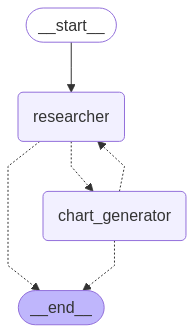

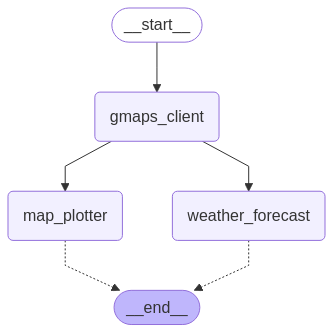

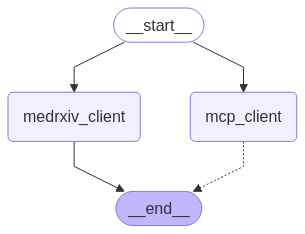

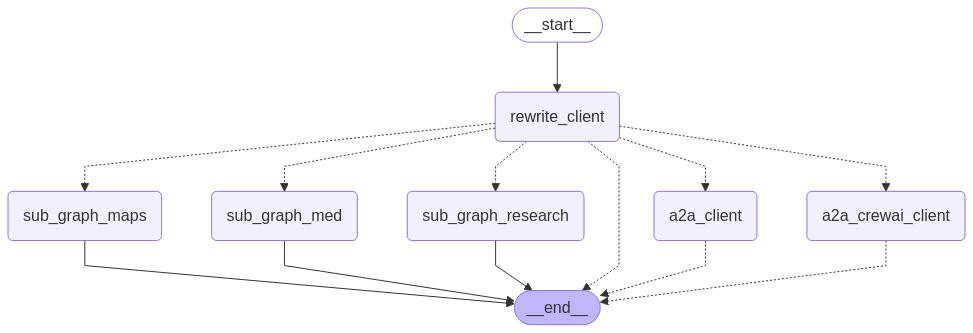

In [27]:
from IPython.display import Image, display

try:
    display(Image(subgraph_research.get_graph().draw_mermaid_png()))
    display(Image(subgraph_maps.get_graph().draw_mermaid_png()))
    display(Image(subgraph_med.get_graph().draw_mermaid_png()))
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    display(Image(subgraph_research.get_graph().draw_png())) # Need pygraphviz pkg
    display(Image(subgraph_maps.get_graph().draw_png())) # Need pygraphviz pkg
    display(Image(subgraph_med.get_graph().draw_png())) # Need pygraphviz pkg
    display(Image(graph.get_graph().draw_png()))
    # This requires some extra dependencies and is optional
    pass

## Test use cases

In [28]:
message_1 = [
            (
                "user",
                "First, get the US quarterly GDP numbers during Trump's first term then make one line chart. "
                "Once you make the chart, comment on the macro economic performance then finish.",
            )
        ]
message_2 = [
            (
                "user",
                "During Trump's latest reciprocal tariff annoucement, which country will be levied the highest tariff rate?"
                "You might need to web search the latest news. ",
            )
        ]

message_3 = [
            (
                "user",
                "Show me the location of the Declaration of Independence from US Maps."
            )
        ]

message_4 = [
            (
                "user",
                "Extract pdf file from this url link https://arxiv.org/pdf/2503.11074 and output text content."
            )
        ]

message_5 = [
            (
                "user",
                "Generate a high res image dipicting lake Tahoe with snow covered peaks at the back and a running strem in the front."
            )
        ]
message_6 = [
            (
                "user",
                "Search medical archives on how to treat a serve falling wound with bleeding in a remote area."
            )
        ]
message_7 = [
            (
                "user",
                "Search medical arcieve medrxiv for Evidence for a Causal Pathway Between Socioeconomic Status and Melanoma in Situ."
            )
        ]

## Execute the user query

In [33]:
config = {"configurable": {"thread_id": "abc123", "recursion_limit": 15, "checkpoint_id": "1ef663ba-28fe-6528-8002-5a559208592c"}}
events = graph.astream(
    {"messages": message_6},
    config
)
async for s in events:
    print(s)
    print("----")

Here: Search medical archives on how to treat a serve falling wound with bleeding in a remote area.


NOW state after rewite: Research medical literature on effective methods for treating a severe, bleeding wound caused by a fall in a remote location.


Before router_dispatcher: {'messages': [HumanMessage(content='Research medical literature on effective methods for treating a severe, bleeding wound caused by a fall in a remote location.', additional_kwargs={}, response_metadata={}, id='5238d932-1d77-4002-bddb-a754dcf14429'), HumanMessage(content='Research medical literature on effective methods for treating a severe, bleeding wound caused by a fall in a remote location.', additional_kwargs={}, response_metadata={}, id='c8167b25-df72-4d4d-9054-b4860f598aff')]}


..and message: [HumanMessage(content='Research medical literature on effective methods for treating a severe, bleeding wound caused by a fall in a remote location.', additional_kwargs={}, response_metadata={}, id='5238d932-1d77

  + Exception Group Traceback (most recent call last):
  |   File "/home/aaron/.conda/envs/firstaid/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3665, in run_code
  |     await eval(code_obj, self.user_global_ns, self.user_ns)
  |   File "/tmp/ipykernel_12418/92700255.py", line 6, in <module>
  |     async for s in events:
  |   File "/home/aaron/.conda/envs/firstaid/lib/python3.12/site-packages/langgraph/pregel/__init__.py", line 2651, in astream
  |     async for _ in runner.atick(
  |   File "/home/aaron/.conda/envs/firstaid/lib/python3.12/site-packages/langgraph/pregel/__init__.py", line 2769, in ainvoke
  |     async for chunk in self.astream(
  |   File "/home/aaron/.conda/envs/firstaid/lib/python3.12/site-packages/langgraph/pregel/__init__.py", line 2651, in astream
  |     async for _ in runner.atick(
  |   File "/tmp/ipykernel_12418/3708187053.py", line 12, in medrxiv_node
  |     async with stdio_client(server_params_medrxiv) as (read, write):
  |     

In [ ]:
from PIL import Image
from IPython.display import display

img = Image.open('../images/cat_dog.png')
display(img)